# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [10]:
# Libraries
import numpy as np
import pandas as pd
# Your Code Here
import seaborn as sns
import matplotlib.pyplot as plt

## Challenge 
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [2]:
fitbit = pd.read_csv('../data/Fitbit2.csv')

#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays?
**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

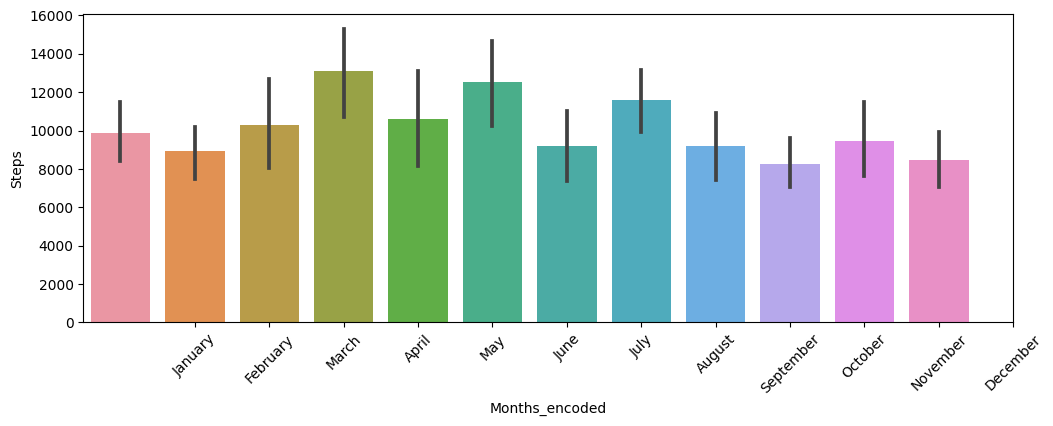

In [35]:
# AVERAGE STEPS BY MONTH_ENCODED
# your code here

grouped_data = fitbit.groupby('Months_encoded')['Steps'].mean().reset_index()
plt.figure(figsize=(12,4))
sns.barplot(x=fitbit['Months_encoded'], y=fitbit['Steps'])
plt.xticks(fitbit['Months_encoded'].unique(), fitbit['Months'].unique(), rotation=45); #I don't know why is everything defaceded

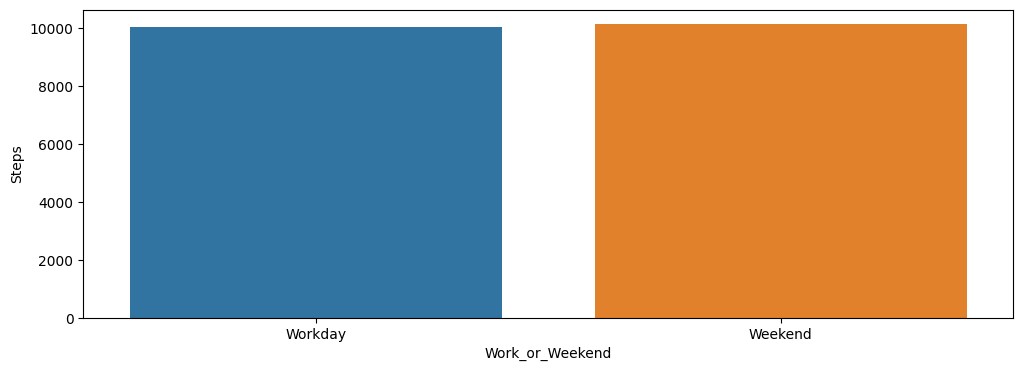

In [39]:
# AVERAGE STEPS BY WORK_OR_WEEKEND
# your code here
grouped_data = fitbit.groupby('Work_or_Weekend')['Steps'].mean().reset_index()
plt.figure(figsize=(12,4))
sns.barplot(x=grouped_data['Work_or_Weekend'], y=grouped_data['Steps'])
plt.xticks(grouped_data['Work_or_Weekend'], ['Workday', 'Weekend']);

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

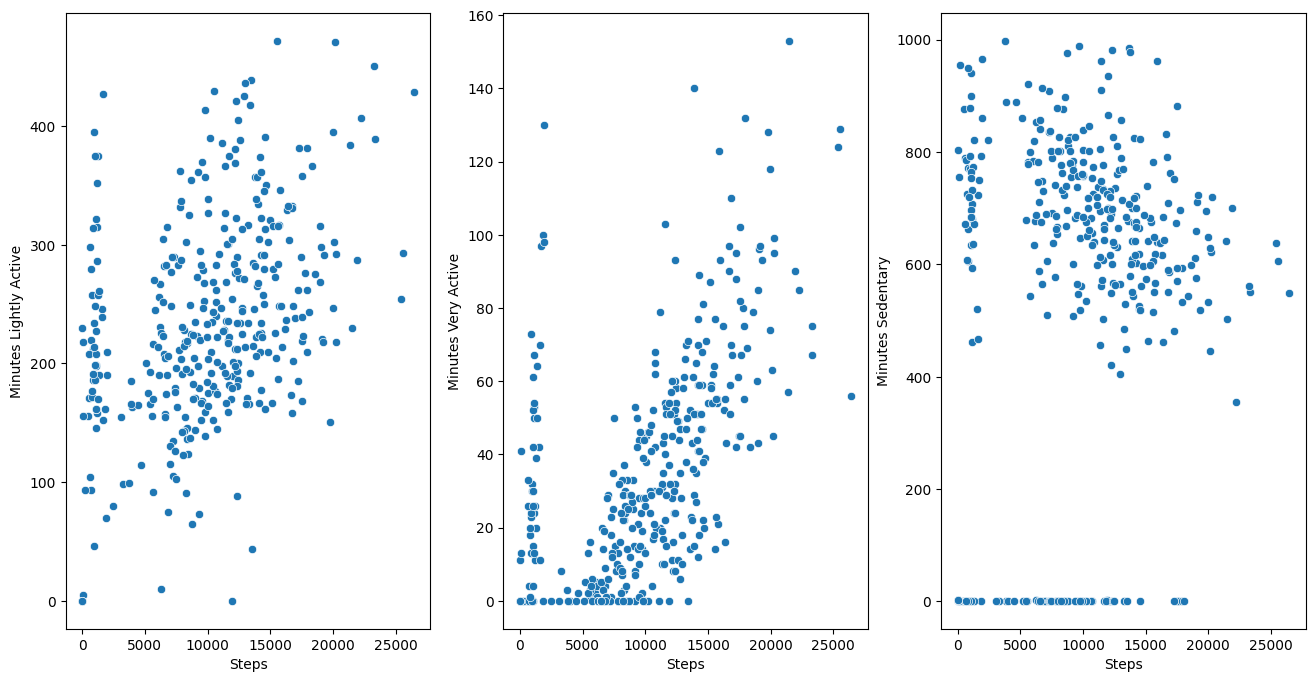

In [49]:
loop=['Minutes Lightly Active', 'Minutes Very Active', 'Minutes Sedentary']
fig,axs = plt.subplots(nrows=1, ncols=3, figsize=(16,8))
j=0
for i in loop:
    sub = sns.scatterplot(x=fitbit['Steps'], y=fitbit[i], ax=axs[j])
    j+=1

## Challenge 

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [51]:
titanic = pd.read_csv('../data/titanic.csv')

#### Explore the titanic dataset using Pandas dtypes.

In [53]:
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [59]:
# NUMERICAL VARIABLES
titanic.select_dtypes('number').columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [60]:
# CATEGORICAL VARIABLES
titanic.select_dtypes(object).columns

Index(['Name', 'Gender', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [61]:
# your code here

#?????

#### Use the right visulalization to show the distribution of column `Age`.

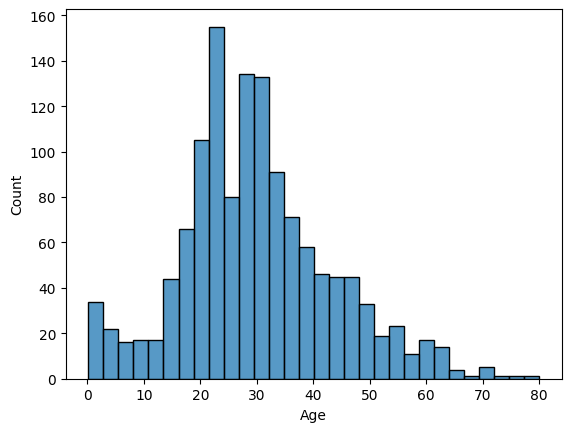

In [63]:
sns.histplot(data=titanic, x='Age');

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

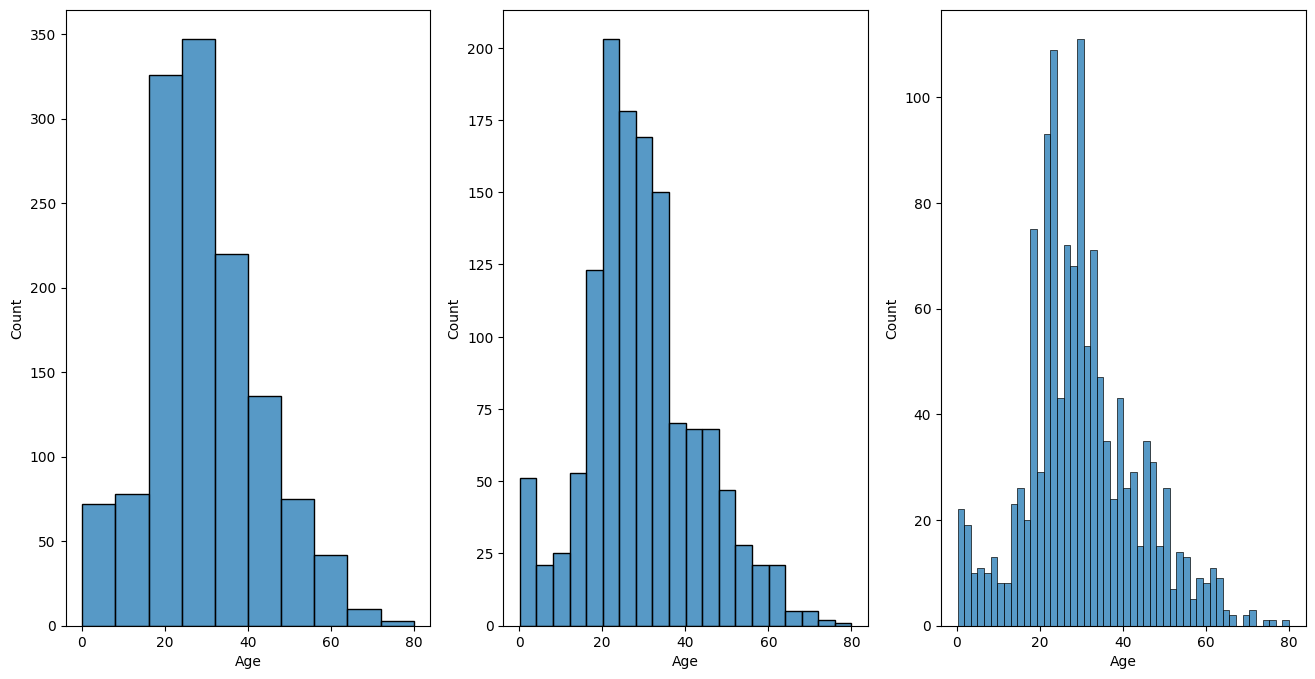

In [65]:
fig,axs = plt.subplots(nrows=1, ncols=3, figsize=(16,8))
bins=[10, 20, 50]
for i in range(len(bins)):
    sub = sns.histplot(data=titanic, x='Age', ax=axs[i], bins=bins[i])

#### How does the bin size affect your plot?

In [ ]:
"""
Actually I am not controlling the bin size, but the number of bins.
"""

#### Use seaborn to show the distribution of column `Age`.

In [66]:
#Already showed...

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

<BarContainer object of 2 artists>

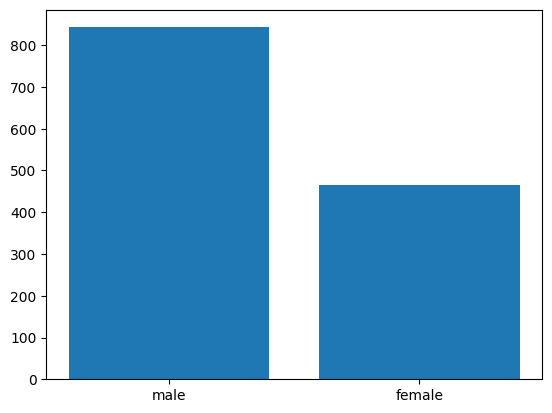

In [70]:
# Method 1 - matplotlib
gender_counts = titanic['Gender'].value_counts()
plt.bar(gender_counts.index, height=gender_counts.values)

<Axes: xlabel='Gender', ylabel='count'>

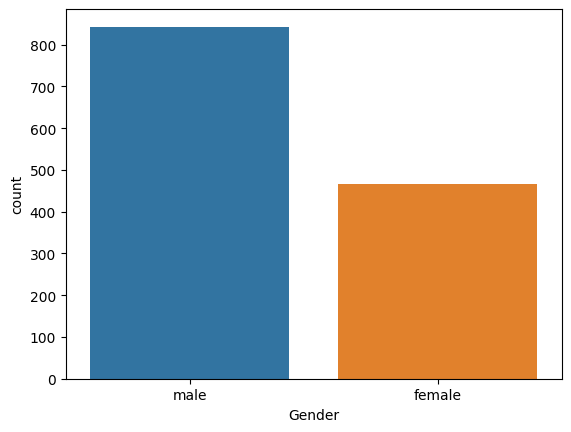

In [72]:
# Method 2 - seaborn
sns.countplot(data=titanic, x='Gender')

#### Use the right plot to visualize the column `Pclass`.

<Axes: xlabel='Pclass', ylabel='count'>

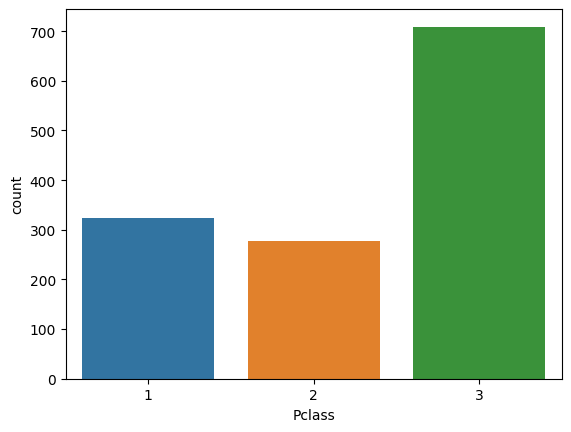

In [73]:
# your code here

sns.countplot(data=titanic, x='Pclass')

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

In [106]:
median = titanic['Age'].median()
nob = "n: " + str(titanic["Age"].size)

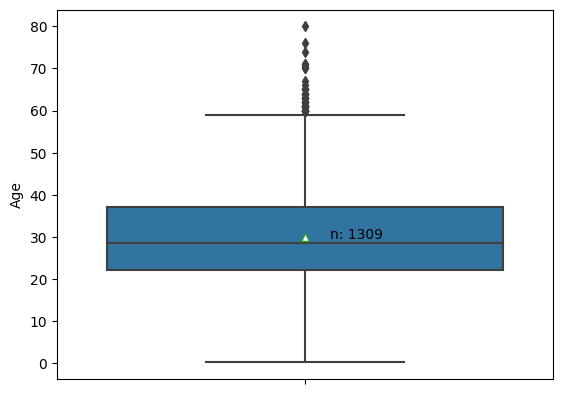

In [104]:
sns.boxplot(data=titanic, y='Age', showmeans=True, meanprops={'markerfacecolor':'white'})
plt.text(0.05, medians+1, nobs);

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

<Axes: xlabel='Age'>

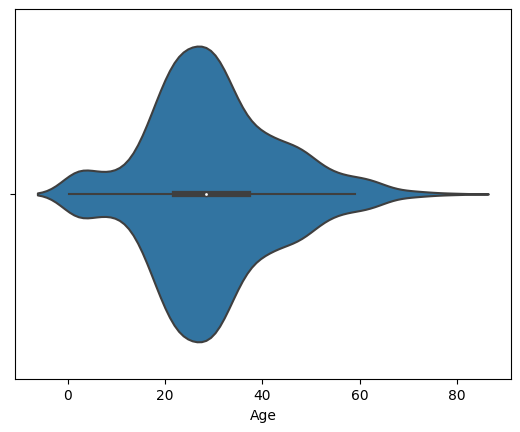

In [109]:
sns.violinplot(data=titanic, x='Age')

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

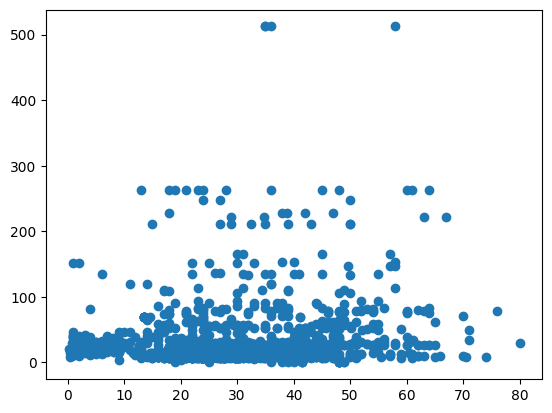

In [111]:
# Method 1 - matplotlib
plt.scatter(data=titanic, x='Age', y='Fare')

<Axes: xlabel='Age', ylabel='Fare'>

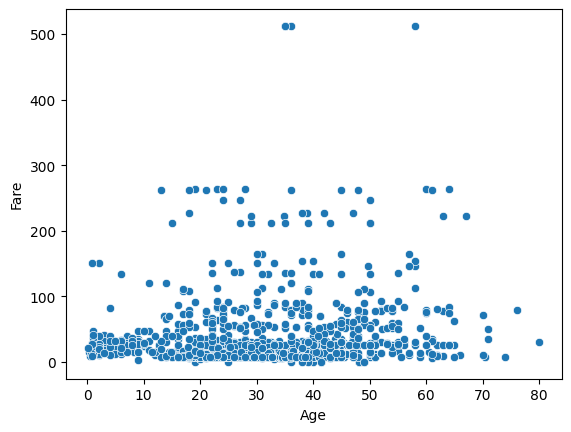

In [112]:
# Method 2 - seaborn
sns.scatterplot(data=titanic, x='Age', y='Fare')

#### Plot the correlation matrix using seaborn.

<Axes: >

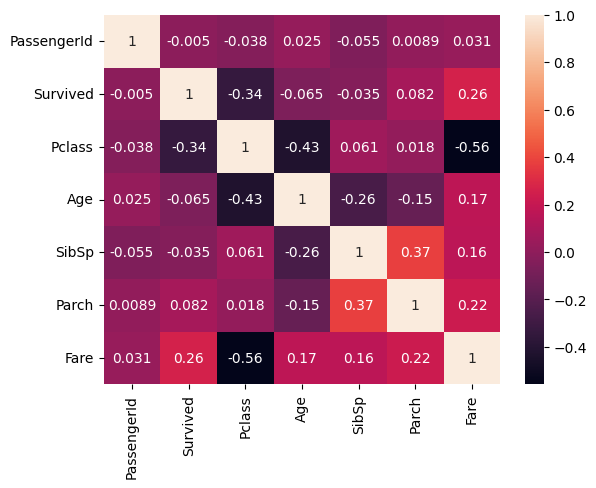

In [130]:
sns.heatmap(titanic.select_dtypes('number').corr(), annot=True)

#### What are the most correlated features?

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

In [ ]:
# your code here

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

In [ ]:
# your code here